In [8]:
# Import Libraries
import os
import pandas as pd
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import classification_report, confusion_matrix
import joblib
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import norm


In [ ]:
# Download penguins dataset
df = sns.load_dataset("penguins")

# Drop missing values
df = df.dropna()

## Encode Catagorical Variables
# Label encode the (species) target variable
le = LabelEncoder()
df["species"] = le.fit_transform(df["species"])

In [5]:
# Dataset Stats
df.describe()
df.head()
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 344 entries, 0 to 343
Data columns (total 7 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   species            344 non-null    object 
 1   island             344 non-null    object 
 2   bill_length_mm     342 non-null    float64
 3   bill_depth_mm      342 non-null    float64
 4   flipper_length_mm  342 non-null    float64
 5   body_mass_g        342 non-null    float64
 6   sex                333 non-null    object 
dtypes: float64(4), object(3)
memory usage: 18.9+ KB


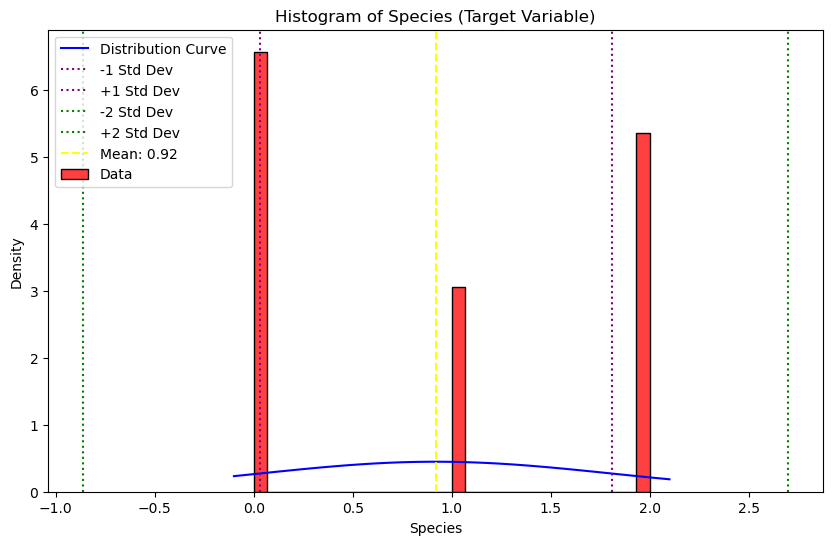

In [9]:
# Drop missing values
df = df.dropna()

## Encode Catagorical Variables
# Label encode the (species) target variable
le = LabelEncoder()
df["species"] = le.fit_transform(df["species"])

# Extract the column
data_column = df['species']
mean, std = data_column.mean(), data_column.std()

# Plot histogram
plt.figure(figsize=(10, 6))
sns.histplot(data_column, bins=30, stat='density', color='red', label='Data')

# Normal distribution curve
x = np.linspace(*plt.xlim(), 100)
plt.plot(x, norm.pdf(x, mean, std), 'blue', label='Distribution Curve')

# Mean and Std Dev lines
for i, color in zip([1, 2], ['purple', 'green']):
    plt.axvline(mean - i*std, color=color, linestyle=':', label=f'-{i} Std Dev')
    plt.axvline(mean + i*std, color=color, linestyle=':', label=f'+{i} Std Dev')

plt.axvline(mean, color='yellow', linestyle='--', label=f'Mean: {mean:.2f}')

# Final touches
plt.title('Histogram of Species (Target Variable)')
plt.xlabel('Species')
plt.ylabel('Density')
plt.legend()
plt.show()
